# Unit 5 - Financial Planning

In [183]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [184]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [185]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [186]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [187]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_resp = requests.get(btc_url)
btc_resp.json()
# Fetch current ETH price
# YOUR CODE HERE!
eth_resp = requests.get(eth_url)

# Compute current value of my crpto
# YOUR CODE HERE!

my_btc_value = my_btc * btc_resp.json()['data']['1']['quotes']['USD']['price']
my_eth_value = my_eth * eth_resp.json()['data']['1027']['quotes']['USD']['price']
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $60548.40
The current value of your 5.3 ETH is $21641.86


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [188]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [189]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
# alpaca_api_key = 'PKTESGU1OZ505SZA84LI'
# alpaca_secret_key = '1TWdGGb1BV1cJ6pxJdf6wSMpKDZRJi4m8zA70Qi0'
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    key_id=alpaca_api_key,
    secret_key=alpaca_secret_key,
    base_url='https://paper-api.alpaca.markets',
    api_version = "v2"
)
alpaca_api_key

'PKTESGU1OZ505SZA84LI'

In [190]:
# Format current date as ISO format
# YOUR CODE HERE!
start_date = pd.Timestamp("2017-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-01", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["SPY", "AGG"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_ticker = api.get_barset(tickers, timeframe, limit=1000).df

# Preview DataFrame
# YOUR CODE HERE!
df_ticker.head()

AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2018-01-04 00:00:00-05:00  109.02  109.15  108.9747  109.120  2706462.0   
2018-01-05 00:00:00-05:00  109.15  109.15  108.9500  109.021  2936467.0   
2018-01-08 00:00:00-05:00  109.11  109.11  108.9500  109.000  2842958.0   
2018-01-09 00:00:00-05:00  108.91  108.91  108.6900  108.710  1991045.0   
2018-01-10 00:00:00-05:00  108.48  108.72  108.4300  108.710  3272935.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2018-01-04 00:00:00-05:00     NaN     NaN     NaN     NaN         NaN  
2018-01-05 00:00:00-05:00  272.50  273.56  271.95  273.39  45782622.0  
2018-01-08 00:00:00-05:00  273.31  274.10  272.98  273.93  33627800.0  
2018-01-09 00:00:00-05:00  274.40  275.25  274.09  274.53  40421422.0  
2018-01-10 00:00:00-05:00  273.69  274.42  272.92  274.10  41575815.0

In [191]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

agg_close = df_ticker['AGG']['close']
spy_close = df_ticker['SPY']['close']
agg_close_price = agg_close.iloc[-1]
spy_close_price = spy_close.iloc[-1]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.19
Current SPY closing price: $470.58


In [192]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23529.00
The current value of your 200 AGG shares is $22838.00


### Savings Health Analysis

In [193]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
my_crypto = my_btc_value + my_eth_value
my_shares = my_agg_value + my_spy_value
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame([my_crypto, my_shares], columns=['amount'], index=['crypto', 'shares'])
# Display savings DataFrame
df_savings

,amount
crypto,82190.261
shares,46367.000


<AxesSubplot:ylabel='amount'>

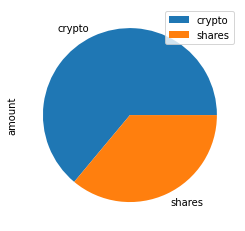

In [194]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='amount')

In [195]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_saving = my_crypto + my_shares
# Validate saving health
# YOUR CODE HERE!
if (total_saving > emergency_fund):
    print('Congratulations! You have enough money in this fund.')
elif (total_saving == emergency_fund):
    print('Congratulations! You reached this financial goal.')
else:
    remain = emergency_fund - total_saving
    print(f'Hurry up! You should get ${remain} more to reach the goal.')

Congratulations! You have enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [196]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
from datetime import datetime
from dateutil.relativedelta import relativedelta
start_date = (datetime.now() - relativedelta(years=5)).date().isoformat()
end_date = (datetime.now() - relativedelta(day=1)).date().isoformat()
print(start_date, end_date)

2016-12-26 2021-12-01


In [197]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000).df
# Display sample data
df_stock_data.head()

AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2018-01-04 00:00:00-05:00  109.02  109.15  108.9747  109.120  2706462.0   
2018-01-05 00:00:00-05:00  109.15  109.15  108.9500  109.021  2936467.0   
2018-01-08 00:00:00-05:00  109.11  109.11  108.9500  109.000  2842958.0   
2018-01-09 00:00:00-05:00  108.91  108.91  108.6900  108.710  1991045.0   
2018-01-10 00:00:00-05:00  108.48  108.72  108.4300  108.710  3272935.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2018-01-04 00:00:00-05:00     NaN     NaN     NaN     NaN         NaN  
2018-01-05 00:00:00-05:00  272.50  273.56  271.95  273.39  45782622.0  
2018-01-08 00:00:00-05:00  273.31  274.10  272.98  273.93  33627800.0  
2018-01-09 00:00:00-05:00  274.40  275.25  274.09  274.53  40421422.0  
2018-01-10 00:00:00-05:00  273.69  274.42  272.92  274.10  41575815.0

In [198]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_thirtyyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [199]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirtyyears.portfolio_data.head()

AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2018-01-04 00:00:00-05:00  109.02  109.15  108.9747  109.120  2706462.0   
2018-01-05 00:00:00-05:00  109.15  109.15  108.9500  109.021  2936467.0   
2018-01-08 00:00:00-05:00  109.11  109.11  108.9500  109.000  2842958.0   
2018-01-09 00:00:00-05:00  108.91  108.91  108.6900  108.710  1991045.0   
2018-01-10 00:00:00-05:00  108.48  108.72  108.4300  108.710  3272935.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-01-04 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2018-01-05 00:00:00-05:00    -0.000907  272.50  273.56  271.95  273.39   
2018-01-08 00:00:00-05:00    -0.000193  273.31  274.10  272.98  273.93   
2018-01-09 00:00:00-05:00    -0.002661  274.40  275.25  274.09  274.53   
2018-01-10 00:00:00-05:00     0.000000  273.69  274.42  272.92  274.10   

                                                    
                               volume daily_return  
time                                                
2018-01-04 00:00:00-05:00         NaN          NaN  
2018-01-05 00:00:00-05:00  45782622.0          NaN  
2018-01-08 00:00:00-05:00  33627800.0     0.001975  
2018-01-09 00:00:00-05:00  40421422.0     0.002190  
2018-01-10 00:00:00-05:00  41575815.0    -0.001566

In [200]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/Updev/Downloads/RUT-VIRT-FIN-PT-11-2021-U-C-main 2/Homework/05-APIsHW/Instructions/Final_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992381,1.000726,0.998267,1.009317,1.004050,0.989280,0.993154,1.001935,0.998376,0.997038,...,1.005244,0.999418,1.007282,1.007786,1.005340,0.996475,0.995502,0.999514,0.997380,0.997609
2,0.985170,1.006402,0.996375,1.015950,1.001424,0.992221,1.004459,0.999875,1.004686,1.003960,...,1.004486,1.004850,0.999570,1.003731,1.005843,0.991888,0.997983,1.010695,0.987192,0.995668
3,0.976449,1.008232,0.999628,1.015284,0.997444,0.999168,1.005097,1.000683,0.991824,0.993309,...,1.010374,0.995982,1.006137,1.002572,1.003981,0.987655,1.006264,1.018845,0.980853,0.986441
4,0.977985,1.008519,1.002473,1.016343,0.993834,1.007685,1.004017,1.002566,0.994365,0.997550,...,1.000893,1.003068,1.001441,1.004548,0.995411,0.994061,0.992223,1.021588,0.984978,0.997163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.997303,5.838297,11.780185,14.878134,9.929390,14.552734,10.824029,6.659323,11.049810,8.152365,...,9.792247,5.381960,7.466236,8.056626,19.627970,5.322632,3.876865,9.917842,3.069351,15.048062
7557,9.949953,5.803057,11.904152,14.953336,9.806395,14.511858,10.718598,6.677621,10.985825,8.154403,...,9.795591,5.337474,7.384764,8.107766,19.799080,5.250036,3.866910,9.850552,3.069914,15.090448
7558,10.005741,5.809489,11.974239,14.822794,9.785830,14.556487,10.656228,6.681959,11.028427,8.145350,...,9.761721,5.343218,7.351140,7.986431,19.916880,5.252857,3.877100,9.814784,3.071434,14.949379
7559,10.014418,5.806284,12.010331,14.685887,9.790710,14.580056,10.666160,6.652638,11.019549,8.124576,...,9.836385,5.321027,7.371561,8.023407,19.680297,5.227602,3.896982,9.859870,3.097291,14.974475


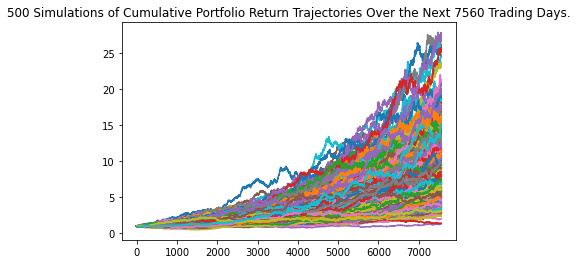

In [201]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirtyyears.plot_simulation()

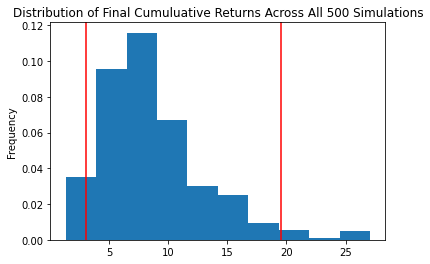

In [202]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirtyyears.plot_distribution()

### Retirement Analysis

In [203]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirtyyears.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              8.669244
std               4.301991
min               1.337685
25%               5.792582
50%               7.724565
75%              10.695066
max              27.070753
95% CI Lower      3.069237
95% CI Upper     19.539472
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [204]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $61384.73 and $390789.45


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [205]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $92077.1 and $586184.17


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [206]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [207]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/Updev/Downloads/RUT-VIRT-FIN-PT-11-2021-U-C-main 2/Homework/05-APIsHW/Instructions/Final_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998344,1.010535,1.007563,0.996904,0.997836,0.993685,1.002643,1.012025,0.996900,1.002695,...,1.004004,1.005214,0.998839,0.998447,0.999646,0.986896,1.002249,1.004290,1.011645,0.994473
2,0.985071,1.008701,1.013655,0.994288,0.991525,1.005065,0.992004,1.016694,0.991452,1.012399,...,0.999621,1.005815,0.994949,0.994729,0.993781,0.988855,1.010909,1.014714,1.011200,0.999409
3,0.980322,1.001295,1.011666,0.990076,0.991382,1.005152,0.993477,1.026428,0.982724,1.018206,...,1.000602,1.007334,0.999849,1.003705,0.995885,0.986274,1.007960,1.011047,1.014924,0.997890
4,0.983372,0.999989,1.001099,0.996847,0.986267,1.011373,0.998466,1.018546,0.998429,1.033219,...,0.998742,0.994170,0.989399,0.996509,0.997865,0.989442,1.010597,1.002879,1.006018,0.999826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.402618,1.847453,1.461296,1.535799,1.331570,1.136689,1.244026,2.210562,0.837191,1.266333,...,1.309341,1.567226,1.064533,1.357703,1.072247,1.107657,1.154841,1.649620,2.157147,1.209305
1257,1.416752,1.850068,1.466187,1.552624,1.333136,1.130785,1.241804,2.221586,0.833980,1.256898,...,1.316978,1.562369,1.067311,1.356504,1.067486,1.123266,1.147794,1.641639,2.170297,1.199275
1258,1.409195,1.829109,1.471023,1.557745,1.331242,1.123775,1.236309,2.225101,0.839432,1.246431,...,1.308778,1.564705,1.061065,1.364184,1.076073,1.119588,1.151916,1.634854,2.173391,1.200198
1259,1.400032,1.847617,1.478975,1.574396,1.338100,1.118460,1.241583,2.229015,0.844960,1.252198,...,1.301422,1.566396,1.053995,1.368657,1.070823,1.120139,1.167830,1.640893,2.194648,1.213469


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

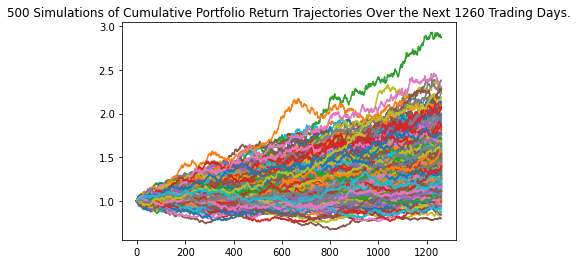

In [208]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_fiveyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

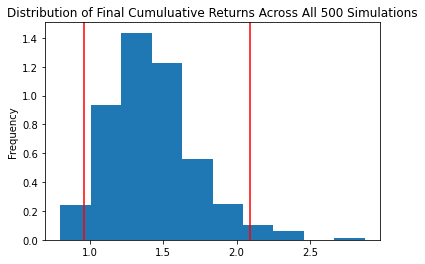

In [209]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_fiveyear.plot_distribution()

In [210]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_fiveyear = MC_fiveyear.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl_fiveyear)

count           500.000000
mean              1.421537
std               0.289147
min               0.798534
25%               1.219795
50%               1.398845
75%               1.574668
max               2.873073
95% CI Lower      0.960001
95% CI Upper      2.092096
Name: 1260, dtype: float64


In [211]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000 * 10
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $200000 in the portfolio over the next 5 years will end within in the range of $613847.32 and $3907894.48


### Ten Years Retirement Option

In [212]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [213]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/Updev/Downloads/RUT-VIRT-FIN-PT-11-2021-U-C-main 2/Homework/05-APIsHW/Instructions/Final_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994528,0.998033,0.995106,1.009730,0.998070,0.997273,1.004992,0.988927,0.995634,1.008009,...,1.000267,1.002670,1.013725,0.993632,0.999845,1.005464,0.992519,1.002242,0.999259,0.995211
2,0.992008,1.000004,0.995433,1.004198,1.008080,1.001327,1.007417,0.991990,0.980325,1.014188,...,1.002639,1.005035,1.017771,0.988028,1.008474,0.998900,0.985807,1.006197,0.999908,1.002041
3,0.996661,0.998128,0.998307,1.003366,1.008738,1.000582,0.997254,0.997031,0.978086,1.024865,...,1.008491,0.991294,1.019284,0.990280,1.010124,0.991884,0.987318,1.008308,0.990766,1.000064
4,0.991450,0.997875,0.994458,0.997517,1.007114,1.004123,1.005171,0.993328,0.976013,1.027354,...,1.010765,0.985737,1.017127,0.994199,1.018399,0.987637,0.988272,0.999530,0.983755,0.999673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.936379,1.751090,1.789136,1.743219,2.233780,1.206793,1.784746,2.283944,2.099695,3.683786,...,1.140998,2.189977,2.025814,1.778904,2.197429,3.130176,2.689203,3.540433,1.946438,1.778433
2517,2.943652,1.758520,1.781709,1.729389,2.235718,1.212098,1.781590,2.287119,2.091920,3.632064,...,1.133565,2.189747,2.025282,1.796454,2.180034,3.145862,2.673943,3.547776,1.945452,1.775935
2518,2.945950,1.746286,1.773084,1.726550,2.249010,1.217735,1.789788,2.292421,2.087109,3.624082,...,1.122443,2.174945,2.024104,1.807668,2.182795,3.173675,2.659712,3.542713,1.943101,1.782807
2519,2.930502,1.755135,1.767385,1.716430,2.244457,1.221541,1.806941,2.272378,2.078513,3.618943,...,1.130857,2.196493,2.005490,1.804979,2.159524,3.192939,2.655872,3.518692,1.946774,1.775642


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

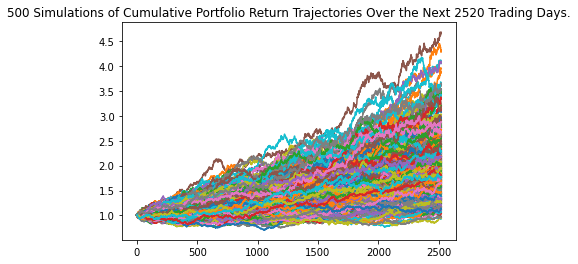

In [214]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_tenyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

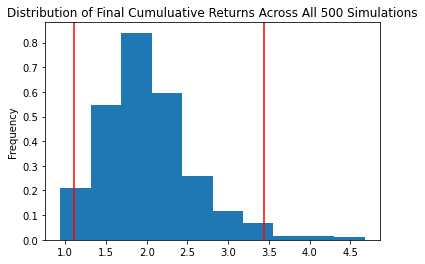

In [215]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_tenyear.plot_distribution()

In [216]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_tenyear = MC_fiveyear.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl_tenyear)

count           500.000000
mean              1.421537
std               0.289147
min               0.798534
25%               1.219795
50%               1.398845
75%               1.574668
max               2.873073
95% CI Lower      0.960001
95% CI Upper      2.092096
Name: 1260, dtype: float64


In [217]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000 * 50
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl_tenyear[8]*initial_investment,2)
ci_upper_ten = round(tbl_tenyear[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $1000000 in the portfolio over the next 10 years will end within in the range of $960000.81 and $2092096.3
